<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01740032-ricardom98/blob/main/actividad1_s7_a01740032.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models

Materia: Ciencia y analítica de datos
<br>
Alumno: Ricardo Morales Bustillos
<br>
Matrícula: A01740032
<br>
Profesor: María de la Paz Rico
<br>
Fecha: 09/11/2022

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

- Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
- Regresión Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Regresión Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
- Finalmente grafica :
-- MAE (de los cuatro métodos)
-- R2 (de los cuatro métodos)
-Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [1]:
#Nuestras librerias
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.linear_model import Ridge, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, power_transform, StandardScaler
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, cross_val_score, train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate
from sklearn.pipeline import Pipeline
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

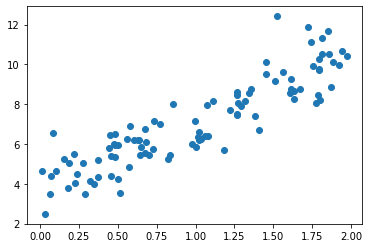

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

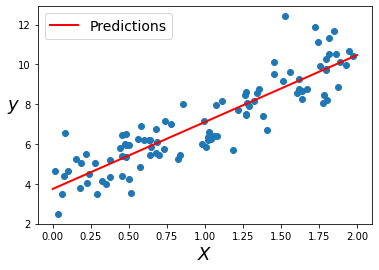

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

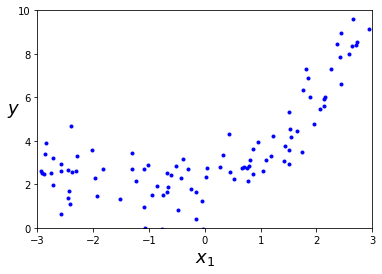

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

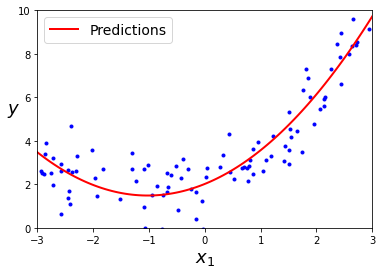

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

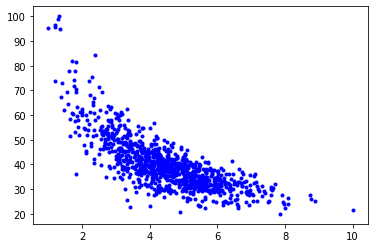

In [26]:
plt.plot(X,y,'b.')

### Regresión lineal

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[]
lista_para_r2 =[] 

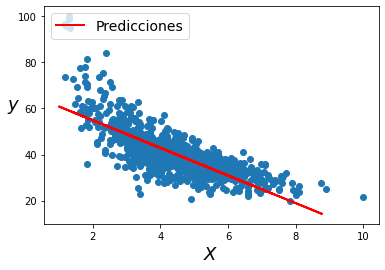

In [28]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test  
y_para_regresion = linear_reg.predict(X_para_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_para_regresion, y_para_regresion, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [29]:
linear_reg.coef_, linear_reg.intercept_

print('Modelo: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple) 
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

MAE = metrics.mean_absolute_error(y_test,y_para_regresion)
RMSE = np.sqrt(MAE)

print('MAE:', MAE)
print('RMSE:', RMSE)

print('r2_score:', r2_score(y_test,y_para_regresion))

Modelo: Y = [-5.98882699] X + 66.83650741226988
MAE: 5.013587781954963
RMSE: 2.2391042365095384
r2_score: 0.6116251549562579


### Resgresión polinomial

In [30]:
# se obtienen las características de la polinomial
pol_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = pol_features.fit_transform(X_train)
print("Input",pol_features.n_input_features_,
      "\n Ouput",pol_features.n_output_features_,
      "\n Powersn",pol_features.powers_)

linear_reg_pol = LinearRegression(fit_intercept=True) 
linear_reg_pol.fit(X_poly, y_train)
linear_reg_pol.coef_, linear_reg_pol.intercept_


Input 1 
 Ouput 2 
 Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [31]:
X_poly.shape

(900, 2)

In [32]:
X_poly_test = poly_features.fit_transform(X_test)
X_poly_test.shape

(100, 2)

In [33]:
y_poly_reg = linear_reg_pol.predict(X_poly_test)
y_poly_reg.shape

(100,)

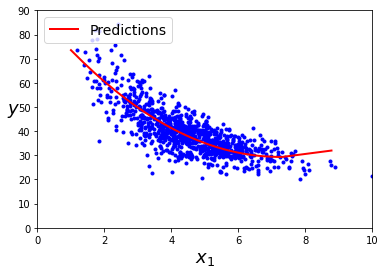

In [34]:
# se ordenan los datos aleatorios para graficar
order = np.argsort(X_test.values.ravel()) 

sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_poly_reg[order]

plt.plot(X, y, "b.")  
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [35]:
print('Modelo: Y =', linear_reg_pol.coef_[1],'X^2 +', linear_reg_pol.coef_[0],'X +',linear_reg_pol.intercept_)

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_poly_reg)
lista_para_mae.append(mae_regresion_lineal_multiple) 
r2_regresion_lineal_multiple = r2_score(y_test,y_poly_reg)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_poly_reg)
r2Score = r2_score(y_test, y_poly_reg)

print('Error medio Absoluto (MAE):', metrica_mae,
      '\n Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_reg)),
      '\n r2_score',r2Score)


Modelo: Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496
Error medio Absoluto (MAE): 4.3833025759681075 
 Root Mean Squared Error: 5.832771301068423 
 r2_score 0.7385501224942537


### Regresión con Ridge y Lasso

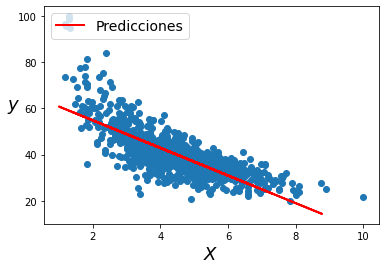

In [36]:
ridge_reg = Ridge(alpha=1.0,fit_intercept=True) 
ridge_reg.fit(X_train, y_train)
X_ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_ridge = ridge_reg.predict(X_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_ridge, y_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [37]:
#metricas del ridge

mae_ridge = metrics.mean_absolute_error(y_test,y_ridge)
lista_para_mae.append(mae_ridge) 
r2_ridge= r2_score(y_test,y_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_ridge)
r2Score = r2_score(y_test, y_ridge)
print('Error medio Absoluto (MAE):', metrica_mae_ridge,
      '\n Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge)),
      '\n r2_score',r2Score)

print('Modelo: Y =', ridge_reg.coef_,'X +', ridge_reg.intercept_)


Error medio Absoluto (MAE): 5.014112691100099 
 Root Mean Squared Error: 7.10938640108989 
 r2_score 0.611578926493084
Modelo: Y = [-5.98505893] X + 66.81965008652344


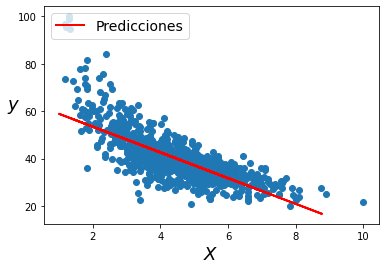

In [38]:
lasso_reg = Lasso(alpha=1.0,fit_intercept=True) 
lasso_reg.fit(X_train, y_train)

X_lasso = X_test  
y_lasso = lasso_reg.predict(X_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_lasso, y_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);


In [39]:
#Las metricas del lasso

mae_lasso = metrics.mean_absolute_error(y_test,y_lasso)
lista_para_mae.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,y_lasso)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_lasso)
r2Score = r2_score(y_test, y_lasso)
print('Error medio Absoluto (MAE):', metrica_mae_lasso,
      '\n Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso)),
      '\n r2_score',r2Score)

print('Modelo: Y =', lasso_reg.coef_,'X +', lasso_reg.intercept_)


Error medio Absoluto (MAE): 5.092520710815617 
 Root Mean Squared Error: 7.2156139275269515 
 r2_score 0.5998847335404536
Modelo: Y = [-5.42220651] X + 64.30159616857074


In [40]:
print(lista_para_mae)
print(lista_para_r2)

[5.013587781954963, 4.3833025759681075, 5.014112691100099, 5.092520710815617]
[0.6116251549562579, 0.7385501224942537, 0.611578926493084, 0.5998847335404536]


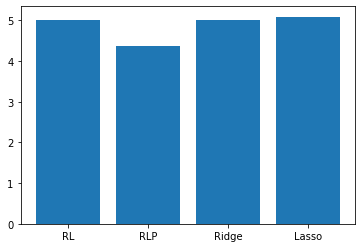

In [41]:
# se grafica el MAE
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae)
plt.show()


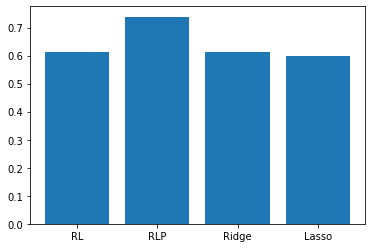

In [42]:
# se grafica la r cuadrada
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_r2)
plt.show()


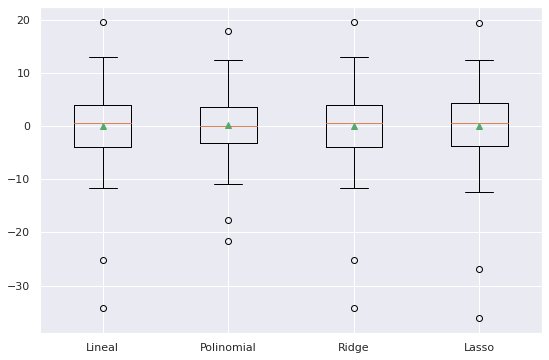

In [43]:
residuo_regresion_simple= y_para_regresion - y_test
residuo_regresion_poliforme= y_poly_reg - y_test
residuo_ridge=y_ridge - y_test
residuo_lasso=y_lasso - y_test
lista_residuos= [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('Lasso')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

### Conclusiones

El modelo con el mejor desempeño es el de regresión lineal polinomial.

Esto se ve representado primeramente en las gráficas de barras. Para el modelo de RLP es de 4.4, mientras que para el resto de los modelos ronda los 5 puntos, lo que significa que los otros modelos presentan un mayor grado de error.

En la segunda gráfica (scatter plot) se muestra la dispersión de los datos y los outliers, se muestra fácilmente que los datos en la RLP están mucho más centrados que en los otros modelos.

El modelo Lasso es el que se ve más afectado, esto se debe a que este método castiga en mayor medida a los coeficientes, provocando alteraciones más 'bruscas' en las predicciones.


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [46]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [47]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


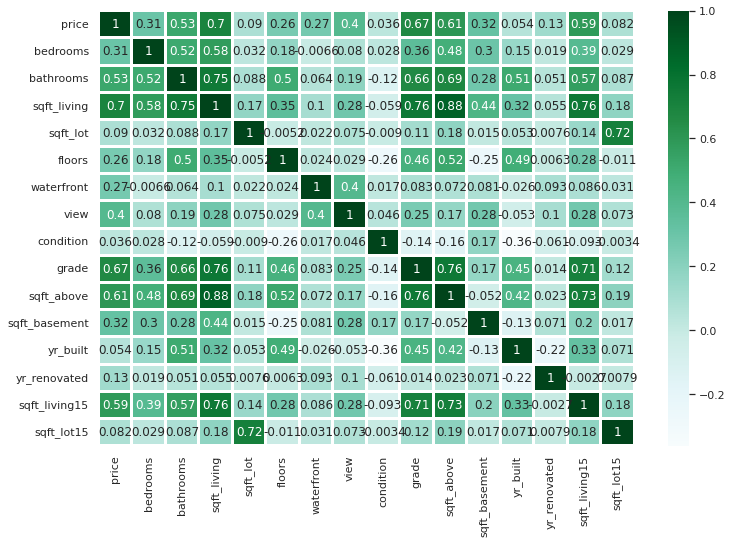

In [48]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='BuGn', linewidths = 2)
plt.show()

In [49]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #Este renglon nos lo fusilamos

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [51]:
#R2 (de los cuatro métodos)